In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
#Reading the 2024 October data we have
future_df = pd.read_csv('ekim_verileri.csv')

In [3]:
future_df

,time,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²)
0,2024-10-01 00:00:00,18.1,94,100,9.7,0.0
1,2024-10-01 01:00:00,18.4,93,100,10.6,0.0
2,2024-10-01 02:00:00,18.4,92,66,11.3,0.0
3,2024-10-01 03:00:00,18.3,94,100,13.8,0.0
4,2024-10-01 04:00:00,18.4,94,51,14.8,0.0
...,...,...,...,...,...,...
716,2024-10-30 20:00:00,18.8,89,4,17.3,0.0
717,2024-10-30 21:00:00,18.4,91,7,15.3,0.0
718,2024-10-30 22:00:00,18.1,93,8,11.5,0.0
719,2024-10-30 23:00:00,17.8,94,5,9.8,0.0


In [4]:
#Convert the time column to the appropriate format
future_df['time'] = pd.to_datetime(future_df['time'])

In [5]:
#Obtaining new properties from time column
future_df['hour'] = future_df['time'].dt.hour
future_df['day'] = future_df['time'].dt.day
future_df['month'] = future_df['time'].dt.month
future_df['year'] = future_df['time'].dt.year


In [6]:
#edit columns
future_df = future_df[['hour', 'day', 'month', 'year', 'temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]

In [7]:
future_df

,hour,day,month,year,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²)
0,0,1,10,2024,18.1,94,100,9.7,0.0
1,1,1,10,2024,18.4,93,100,10.6,0.0
2,2,1,10,2024,18.4,92,66,11.3,0.0
3,3,1,10,2024,18.3,94,100,13.8,0.0
4,4,1,10,2024,18.4,94,51,14.8,0.0
...,...,...,...,...,...,...,...,...,...
716,20,30,10,2024,18.8,89,4,17.3,0.0
717,21,30,10,2024,18.4,91,7,15.3,0.0
718,22,30,10,2024,18.1,93,8,11.5,0.0
719,23,30,10,2024,17.8,94,5,9.8,0.0


In [8]:
#Upload top models
best_solar_model = joblib.load('XGBoost_Solar_Model.joblib')
best_wind_model = joblib.load('DecisionTree_Wind_Model.joblib')


In [9]:
#Restrict the analysis to October only
october_data = future_df[future_df['month'] == 10]
october_data.rename(columns={'irrediance(W/m²)': 'irradiance(W/m²)'}, inplace=True)

In [10]:
# Defining the properties list
features = ['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irradiance(W/m²)']

#Estimate energy consumption
october_data['Predicted_Solar_Generation_kWh'] = best_solar_model.predict(october_data[features])
october_data['Predicted_Wind_Generation_kWh'] = best_wind_model.predict(october_data[features])


In [11]:
#Converting to datetime format
october_data['datetime'] = pd.to_datetime(october_data[['year', 'month', 'day', 'hour']])
october_data = october_data.drop(columns=['datetime'])


In [12]:
october_data.head(30)

,hour,day,month,year,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irradiance(W/m²),Predicted_Solar_Generation_kWh,Predicted_Wind_Generation_kWh
0,0,1,10,2024,18.1,94,100,9.7,0.0,0.000147,0.00
1,1,1,10,2024,18.4,93,100,10.6,0.0,-0.000019,0.18
2,2,1,10,2024,18.4,92,66,11.3,0.0,0.000029,0.39
3,3,1,10,2024,18.3,94,100,13.8,0.0,0.000035,1.14
4,4,1,10,2024,18.4,94,51,14.8,0.0,-0.000058,1.44
5,5,1,10,2024,18.5,93,74,15.7,0.0,-0.000023,1.50
6,6,1,10,2024,18.5,92,84,11.1,0.0,0.000064,0.33
7,7,1,10,2024,18.2,93,100,14.2,0.0,0.000035,1.26
8,8,1,10,2024,17.8,94,100,12.3,4.3,0.016625,0.69
9,9,1,10,2024,18.3,92,89,16.3,0.0,-0.000652,1.50


In [13]:
october_data['datetime'] = pd.to_datetime(october_data[['year', 'month', 'day', 'hour']])

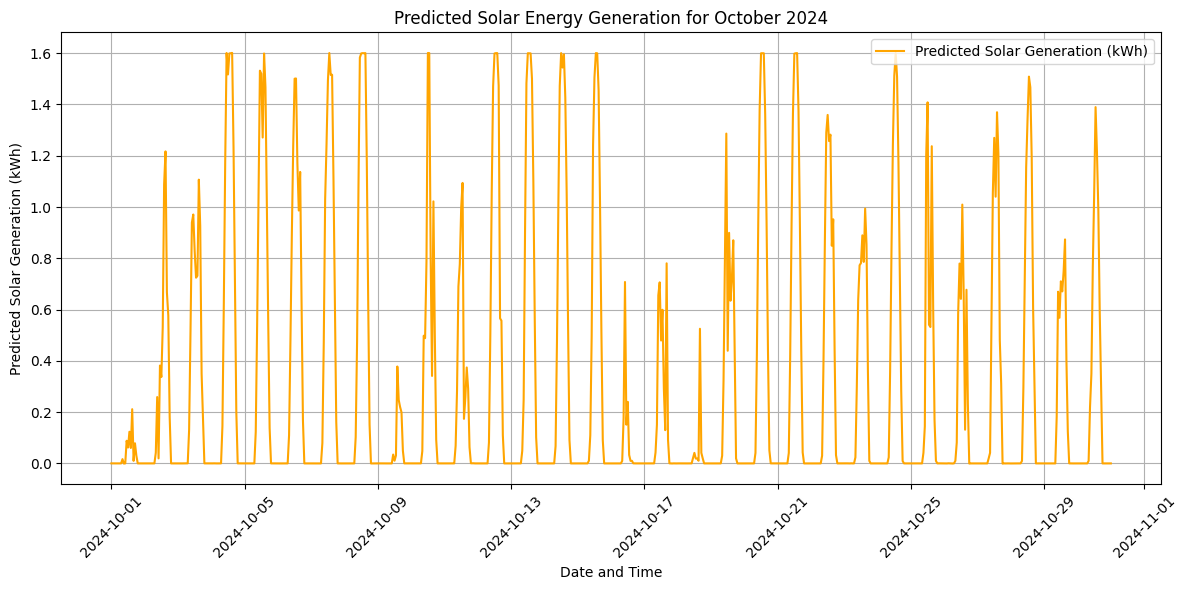

In [14]:
#Graph of solar energy produced
plt.figure(figsize=(12, 6))
plt.plot(october_data['datetime'], october_data['Predicted_Solar_Generation_kWh'], label='Predicted Solar Generation (kWh)', color='orange')
plt.xlabel('Date and Time')
plt.ylabel('Predicted Solar Generation (kWh)')
plt.title('Predicted Solar Energy Generation for October 2024')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

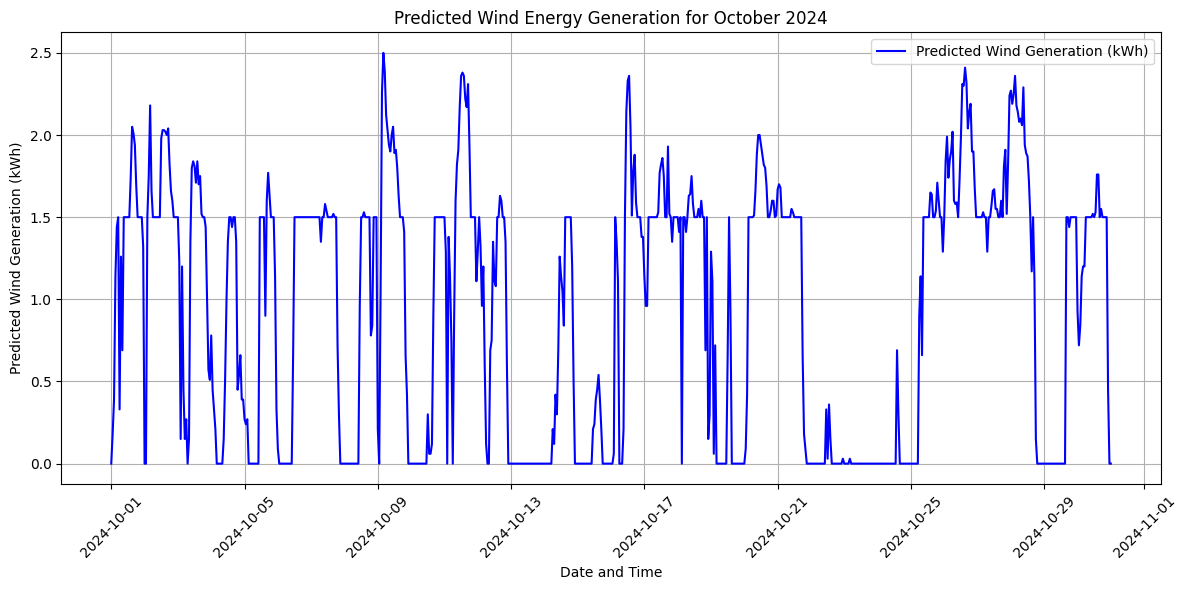

In [15]:
#Generated wind energy graph
plt.figure(figsize=(12, 6))
plt.plot(october_data['datetime'], october_data['Predicted_Wind_Generation_kWh'], label='Predicted Wind Generation (kWh)', color='blue')
plt.xlabel('Date and Time')
plt.ylabel('Predicted Wind Generation (kWh)')
plt.title('Predicted Wind Energy Generation for October 2024')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

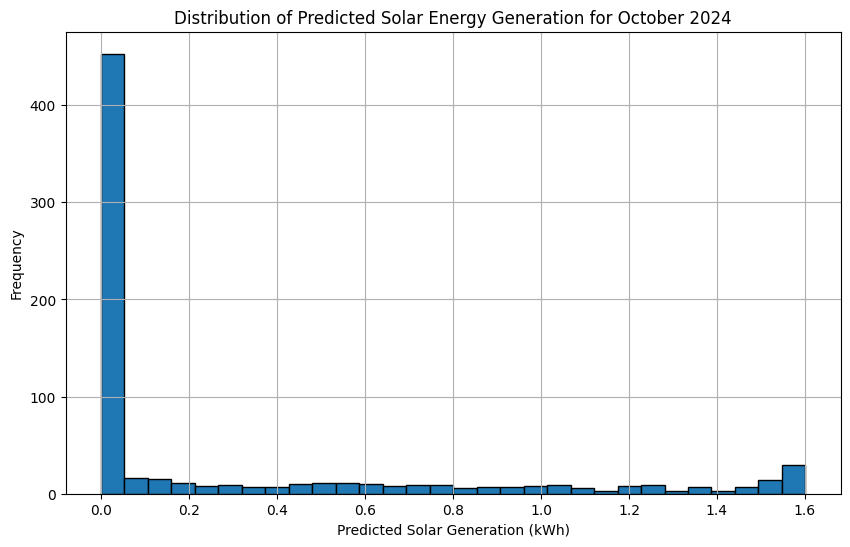

In [16]:
#Solar energy forecast distribution chart
plt.figure(figsize=(10, 6))
plt.hist(october_data['Predicted_Solar_Generation_kWh'], bins=30, edgecolor='black')
plt.xlabel('Predicted Solar Generation (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Solar Energy Generation for October 2024')
plt.grid(True)
plt.show()


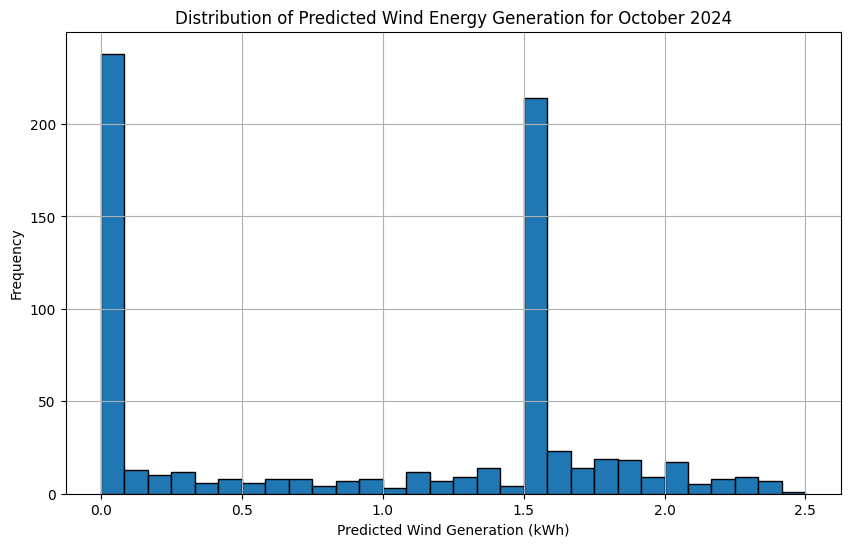

In [17]:
#Wind energy forecast distribution chart
plt.figure(figsize=(10, 6))
plt.hist(october_data['Predicted_Wind_Generation_kWh'], bins=30, edgecolor='black')
plt.xlabel('Predicted Wind Generation (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Wind Energy Generation for October 2024')
plt.grid(True)
plt.show()

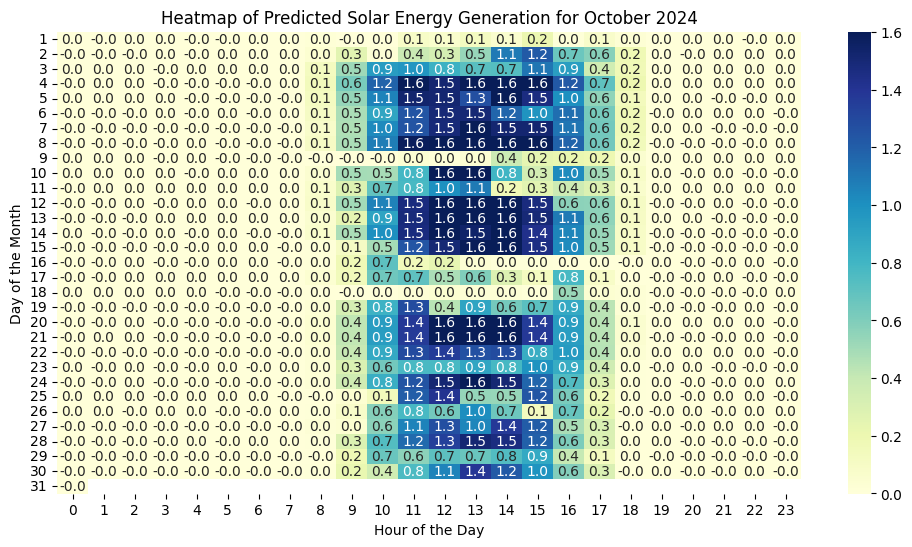

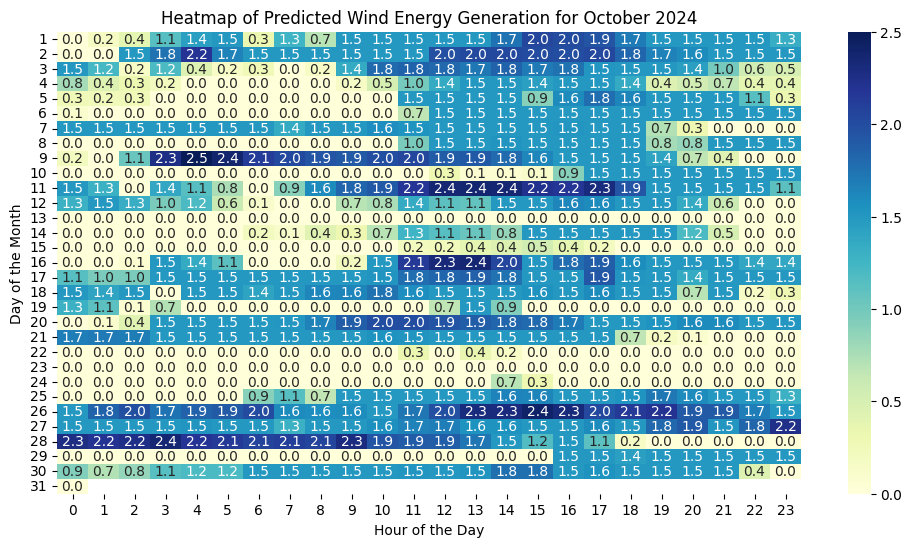

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap graph showing the relationship between consumed energy and time
pivot_table_solar = october_data.pivot_table(values='Predicted_Solar_Generation_kWh', index='day', columns='hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_solar, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.title('Heatmap of Predicted Solar Energy Generation for October 2024')
plt.show()

pivot_table_wind = october_data.pivot_table(values='Predicted_Wind_Generation_kWh', index='day', columns='hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_wind, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.title('Heatmap of Predicted Wind Energy Generation for October 2024')
plt.show()